<a href="https://colab.research.google.com/github/Developer-AD/Airbnb-Bookings-Analysis/blob/main/Airbnb_Bookings_Analysis_Capstone_Project_Solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Since 2008, guests and hosts have used Airbnb to expand on traveling possibilities and present a more unique, personalized way of experiencing the world. Today, Airbnb became one of a kind service that is used and recognized by the whole world. Data analysis on millions of listings provided through Airbnb is a crucial factor for the company. These millions of listings generate a lot of data - data that can be analyzed and used for security, business decisions, understanding of customers' and providers' (hosts) behavior and performance on the platform, guiding marketing initiatives, implementation of innovative additional services and much more. </b>

## <b>This dataset has around 49,000 observations in it with 16 columns and it is a mix between categorical and numeric values. </b>

## <b> Explore and analyze the data to discover key understandings (not limited to these) such as : 
* What can we learn about different hosts and areas?
* What can we learn from predictions? (ex: locations, prices, reviews, etc)
* Which hosts are the busiest and why?
* Is there any noticeable difference of traffic among different areas and what could be the reason for it? </b>

## <b>1. Analyzing the data</b>

In [1]:
# importing essential libraries 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [3]:
# loading the datasets
csv_file_path = '/content/drive/MyDrive/AlmaBetter/CapstoneProject/AirbnbBookingsAnalysis/Airbnb NYC 2019.csv'
airbnb_data = pd.read_csv(csv_file_path)

In [4]:
# printing top five rows for analysis
airbnb_data.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [5]:
# printing bottome five rows for analysis
airbnb_data.tail()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2
48894,36487245,Trendy duplex in the very heart of Hell's Kitchen,68119814,Christophe,Manhattan,Hell's Kitchen,40.76404,-73.98933,Private room,90,7,0,NaN,NaN,1,23


In [6]:
# size of the airbnb dataset
airbnb_data.shape

(48895, 16)

In [7]:
# descrptive analysis about dataset # only requried column values
airbnb_data[ ['price',	'minimum_nights',	'number_of_reviews',	'calculated_host_listings_count',	'availability_365'] ].describe()

,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
count,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000
mean,152.720687,7.029962,23.274466,7.143982,112.781327
std,240.154170,20.510550,44.550582,32.952519,131.622289
min,0.000000,1.000000,0.000000,1.000000,0.000000
25%,69.000000,1.000000,1.000000,1.000000,0.000000
50%,106.000000,3.000000,5.000000,1.000000,45.000000
75%,175.000000,5.000000,24.000000,2.000000,227.000000
max,10000.000000,1250.000000,629.000000,327.000000,365.000000


In [8]:
# describe of object type data in airbnb dataset
airbnb_data.describe(include='object')

,name,host_name,neighbourhood_group,neighbourhood,room_type,last_review
count,48879,48874,48895,48895,48895,38843
unique,47905,11452,5,221,3,1764
top,Hillside Hotel,Michael,Manhattan,Williamsburg,Entire home/apt,2019-06-23
freq,18,417,21661,3920,25409,1413


In [9]:
# all columns of airbnb dataset
airbnb_data.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [11]:
# some extra information about dataset not null values present and data types of columns
airbnb_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

##<b>2. Cleaning the data<b>

In [12]:
# Cleaning the data
# Removing the unwanted columns and store this in new data frame.
# Don't change the original data frame which is airbnb_data
airbnb_new = airbnb_data.drop(['id','name','reviews_per_month', 'last_review'], axis=1)

In [13]:
# Checking for null values in airbnb dataset 
airbnb_new.isnull().sum()

host_id                            0
host_name                         21
neighbourhood_group                0
neighbourhood                      0
latitude                           0
longitude                          0
room_type                          0
price                              0
minimum_nights                     0
number_of_reviews                  0
calculated_host_listings_count     0
availability_365                   0
dtype: int64

In [14]:
# filling host_name null value with unavailable
airbnb_new['host_name'].fillna(value = 'unavailable',inplace=True)

In [15]:
# Checking for null values after filling null value in airbnb dataset 
airbnb_new.isnull().sum()

host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

In [16]:
# top five rows in updated data for check the changes.
airbnb_new.head()

,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
0,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,6,365
1,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2,355
2,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,1,365
3,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,1,194
4,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,1,0


##<b>3. Visualizing the data</b>

**Relationship analysis between different variables**

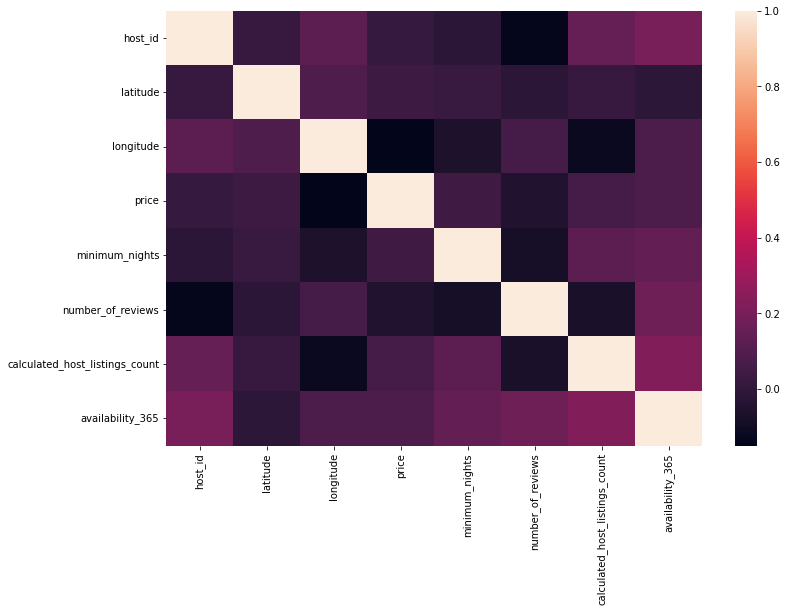

In [17]:
# Correlation or Relationship analysis between different variables in airbnb dataset.
plt.figure(figsize=(12,8))
corelation = airbnb_new.corr()
sns.heatmap(corelation, xticklabels=corelation.columns, yticklabels=corelation.columns, annot=False, linewidths=0)
plt.show()

##<b>Problem Statements</b>

## <b>  1. What can we learn about different hosts and areas?  </b>

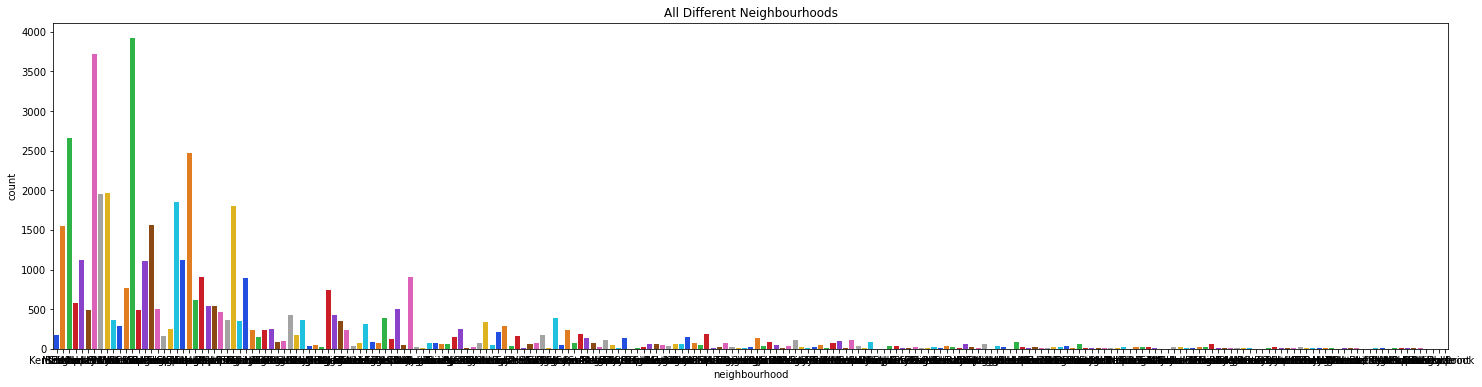

In [18]:
# all different areas

sns.countplot(x = airbnb_new['neighbourhood'], palette="bright")
fig = plt.gcf()
fig.set_size_inches(25,6)
plt.title('All Different Neighbourhoods')
plt.show()

In [20]:
# all different hosts
hosts = airbnb_new.groupby('host_name').count()
hosts.head()

,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
host_name,,,,,,,,,,,
'Cil,1,1,1,1,1,1,1,1,1,1,1
(Ari) HENRY LEE,1,1,1,1,1,1,1,1,1,1,1
(Email hidden by Airbnb),6,6,6,6,6,6,6,6,6,6,6
(Mary) Haiy,1,1,1,1,1,1,1,1,1,1,1
-TheQueensCornerLot,1,1,1,1,1,1,1,1,1,1,1


## <b>2. What can we learn from predictions? (ex: locations, prices, reviews, etc)</b>

**Property distributions in defferent neighbourhood_group**

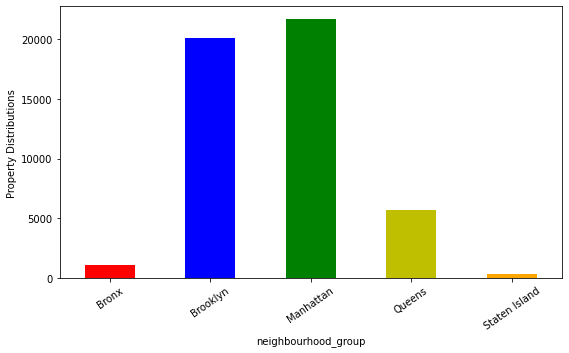

In [21]:
# bar chart for locations or neighbourhood_group
plt.figure(figsize=(9,5))
location = airbnb_new.groupby('neighbourhood_group').size()
location.plot.bar(ylabel='Property Distributions', rot=35, color=['r','b', 'g', 'y','orange'])
plt.show()

**Price on diffrent neighbourhood_group**

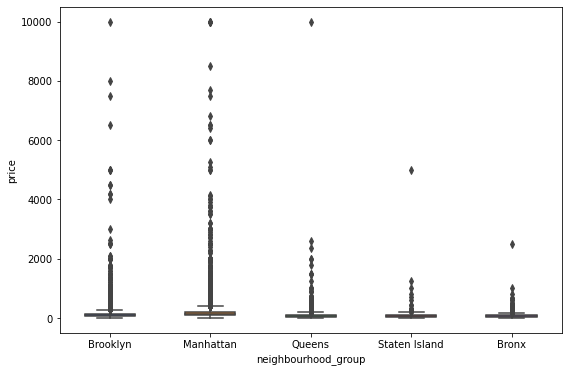

In [22]:
# price on diffrent neighbourhood_group
plt.figure(figsize=(9,6))
sns.boxplot(data = airbnb_new, x='neighbourhood_group', y='price',palette='bright', width=0.5)
plt.show()

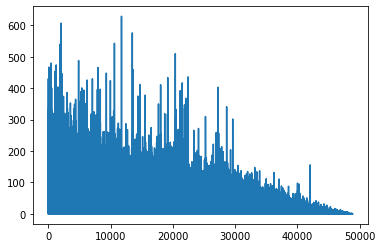

In [23]:
# Total Number of reviews
airbnb_new['number_of_reviews'].plot()
plt.show()

**Types of availabel rooms**

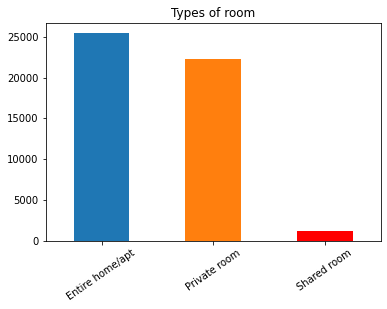

In [24]:
# types of room availabel
airbnb_new['room_type'].value_counts().plot(kind='bar',rot=35 ,color=['tab:blue','tab:orange','red'])
plt.title('Types of room')
plt.show()

**Room availabel per Neighbourhood Group**

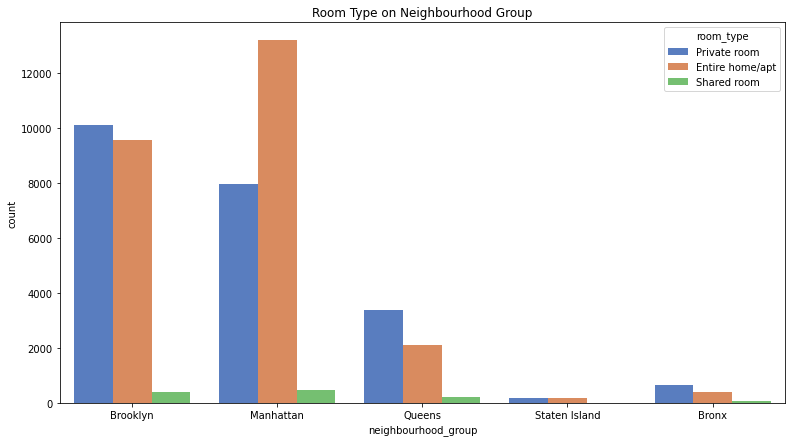

In [25]:
# room availabel per Neighbourhood Group
plt.figure(figsize=(13,7))
plt.title("Room Type on Neighbourhood Group")
sns.countplot(x = airbnb_new.neighbourhood_group, hue = airbnb_new.room_type, palette="muted")
plt.show()

## <b>3. Which hosts are the busiest and why?</b>

In [26]:
# Busies way.
busiest_host=airbnb_new.groupby(['host_name','neighbourhood_group','room_type'])['minimum_nights'].count().reset_index()
desc_ord_host=busiest_host.sort_values('minimum_nights',ascending=False)

top_busies_host = list(desc_ord_host.head()['host_name'])[0]
print("Busies host : ",top_busies_host)
print()

# top five host in descending order.
desc_ord_host.head()

Busies host :  Sonder (NYC)



,host_name,neighbourhood_group,room_type,minimum_nights
16549,Sonder (NYC),Manhattan,Entire home/apt,319
2295,Blueground,Manhattan,Entire home/apt,230
12299,Michael,Manhattan,Entire home/apt,143
9190,Kara,Manhattan,Entire home/apt,129
4128,David,Manhattan,Entire home/apt,117


## <b>4. Is there any noticeable difference of traffic among different areas and what could be the reason for it?</b>

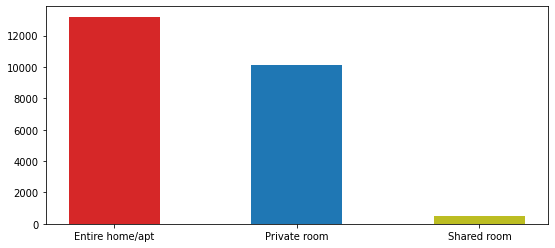

In [27]:
trafic_areas = airbnb_new.groupby(['neighbourhood_group','room_type'])['minimum_nights'].count().reset_index()
trafic_areas.sort_values('minimum_nights',ascending=False)

plt.figure(figsize = (9,4))
plt.bar(trafic_areas['room_type'], trafic_areas['minimum_nights'], color=['tab:red', 'tab:blue', 'tab:olive'], width=0.5)
plt.show()

**Rooms availabilty in different areas**

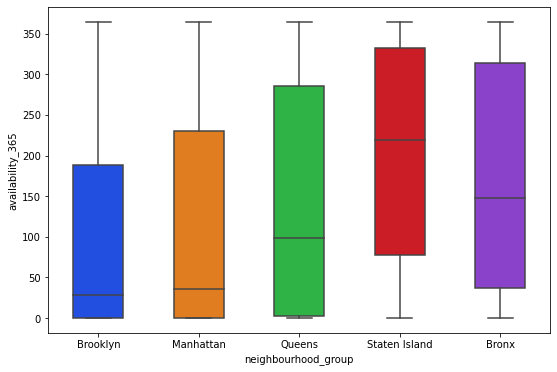

In [29]:
# rooms availabilty in different areas
plt.figure(figsize=(9,6))
sns.boxplot(data = airbnb_new, x='neighbourhood_group', y='availability_365',palette='bright', width=0.5)
plt.show()

**Map of neighbourhood_group**

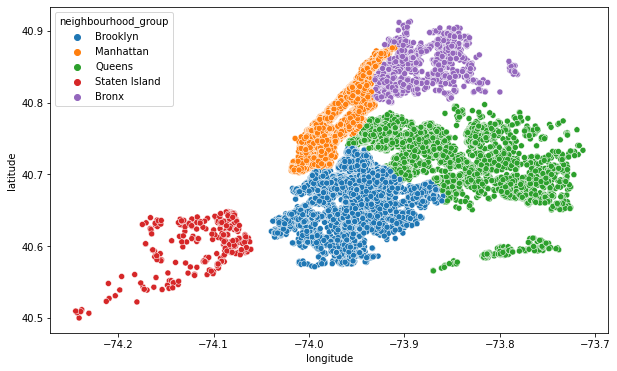

In [30]:
# map of neighbourhood_group
plt.figure(figsize=(10,6))
sns.scatterplot(data=airbnb_new, x='longitude', y='latitude',  hue=airbnb_new.neighbourhood_group)
plt.show()